# **MILESTONE 2**

Name : Muhammad Fawwaz Dynoeputra Isnandar

Batch : HCK - 002

## **OBJECTIVES**

- Mampu memahami konsep supervised learning dan unsupervised learning
- Mampu mempersiapkan data untuk digunakan dalam model supervised learning dan unsupervised learning
- Mampu mengimplementasikan supervised learning dan unsupervised learning dengan dataset yang baru
- Mampu melakukan evaluasi model
- Mampu melakukan model tuning
- Mampu melakukan model deployment

## **PROBLEM STATEMENT**

We want to predict the sales of `used cars` for dealers to make easier determination in price

# **WORKING AREA**

## **IMPORTING LIBRARIES**

In order to work on our Milestone 2 project, we needed libraries in order for us to fulfill this project. Here are the libraries we used :

In [1]:
#Importing Pandas and Numpy Library
import pandas as pd
import numpy as np
#Importing Libraries for Visualization
import matplotlib.pyplot as plt
import seaborn as sns
#Importing our Regression Models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
#Importing our Train and Test split
from sklearn.model_selection import train_test_split,GridSearchCV
#For removing outliers
from feature_engine.outliers import Winsorizer
#For preprocessing purposes 
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
#For evaluation purposes
from sklearn.metrics import mean_absolute_error, r2_score
#Importing Warning filtering
import warnings
warnings.filterwarnings('ignore')
#Setting this notebook to show all data
pd.set_option('display.max_columns', None)
pd.reset_option('max_columns')
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
# For showing our time
import time
#Displaying diagram in our dataframe
from sklearn import set_config
set_config(display='diagram')
import pickle

## **DATA LOADING**

### **ABOUT THE DATASET**

- [LINK_DATASET](https://github.com/makozi/Exploring-eBay-Car-Sales/blob/master/autos.csv)

The dataset was retrieved from the github repository of user : https://github.com/makozi with the dataset link : https://github.com/makozi/Exploring-eBay-Car-Sales/blob/master/autos.csv. This dataset is used cars from eBay Kleinanzeigen, a german ebay website. Here below is the data description retrieved from the source so we could understand the context of each columns better:

- `dateCrawled`         : when advert was first crawled, all field-values are taken from this date
- `name`                : headline, which the owner of the car gave to the advert
- `seller`              : 'privat'(ger)/'private'(en) or 'gewerblich'(ger)/'dealer'(en)
- `offerType`           : 'Angebot'(ger)/'offer'(en) or 'Gesuch'(ger)/'request'(en)
- `price`               : the price on the advert to sell the car
- `abtest`              : ebay-intern variable (argumentation in discussion-section)
- `vehicleType`         : one of eight vehicle-categories 
- `yearOfRegistration`  : at which year the car was first registered
- `gearbox`             : 'manuell'(ger)/'manual'(en) or 'automatik'(ger)/'automatic'(en)
- `powerPS`             : the power of the car in PS
- `model`               : the cars model
- `odometer`           : how many kilometres the car has driven
- `monthOfRegistration` : at which month the car was first registered
- `fuelType`            : one of seven fuel-categories
- `brand`               : the cars brand
- `notRepairedDamage`   : if the car has a damage which is not repaired yet
- `dateCreated`         : the date for which the advert at 'ebay Kleinanzeigen' was created
- `nrOfPictures`        : number of pictures in the advert
- `postalCode`          : where in germany the car is located
- `lastSeen`      : when the crawler saw this advert last online

Now we know what our dataset in this project is about. We want to import our dataset into this notebook and assigning a variable to it:

In [2]:
df = pd.read_csv('/Users/zow/Documents/HACKTIV8/Learning_journal/Phase 1/MILESTONE/MILESTONE 2/autos.csv', encoding='Latin-1')

Now it's time for us to explore our data in the next section.

## **EXPLORATORY DATA ANALYSIS**

> In this section we want to explore our data further in order to understand our data and make assumptions of what to do with our data next.

Next, we are going to take a glimpse at the 5 first and last rows of data from our dataframe:

In [3]:
df.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


In [4]:
df.tail()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
49995,2016-03-27 14:38:19,Audi_Q5_3.0_TDI_qu._S_tr.__Navi__Panorama__Xenon,privat,Angebot,"$24,900",control,limousine,2011,automatik,239,q5,"100,000km",1,diesel,audi,nein,2016-03-27 00:00:00,0,82131,2016-04-01 13:47:40
49996,2016-03-28 10:50:25,Opel_Astra_F_Cabrio_Bertone_Edition___TÜV_neu+...,privat,Angebot,"$1,980",control,cabrio,1996,manuell,75,astra,"150,000km",5,benzin,opel,nein,2016-03-28 00:00:00,0,44807,2016-04-02 14:18:02
49997,2016-04-02 14:44:48,Fiat_500_C_1.2_Dualogic_Lounge,privat,Angebot,"$13,200",test,cabrio,2014,automatik,69,500,"5,000km",11,benzin,fiat,nein,2016-04-02 00:00:00,0,73430,2016-04-04 11:47:27
49998,2016-03-08 19:25:42,Audi_A3_2.0_TDI_Sportback_Ambition,privat,Angebot,"$22,900",control,kombi,2013,manuell,150,a3,"40,000km",11,diesel,audi,nein,2016-03-08 00:00:00,0,35683,2016-04-05 16:45:07
49999,2016-03-14 00:42:12,Opel_Vectra_1.6_16V,privat,Angebot,"$1,250",control,limousine,1996,manuell,101,vectra,"150,000km",1,benzin,opel,nein,2016-03-13 00:00:00,0,45897,2016-04-06 21:18:48


In [5]:
df.shape

(50000, 20)

Our dataset contains **50000 rows** of data and **20 different columns**.

Let's see our whole data clearer :

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   dateCrawled          50000 non-null  object
 1   name                 50000 non-null  object
 2   seller               50000 non-null  object
 3   offerType            50000 non-null  object
 4   price                50000 non-null  object
 5   abtest               50000 non-null  object
 6   vehicleType          44905 non-null  object
 7   yearOfRegistration   50000 non-null  int64 
 8   gearbox              47320 non-null  object
 9   powerPS              50000 non-null  int64 
 10  model                47242 non-null  object
 11  odometer             50000 non-null  object
 12  monthOfRegistration  50000 non-null  int64 
 13  fuelType             45518 non-null  object
 14  brand                50000 non-null  object
 15  notRepairedDamage    40171 non-null  object
 16  date

Here we can see that we have some missing values which lies in `vehicleType`, `gearbox`, `model`, `notRepairedDamage`. We'll get on to them later.

Let's see what kind of type of seller that sells used cars in eBay:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


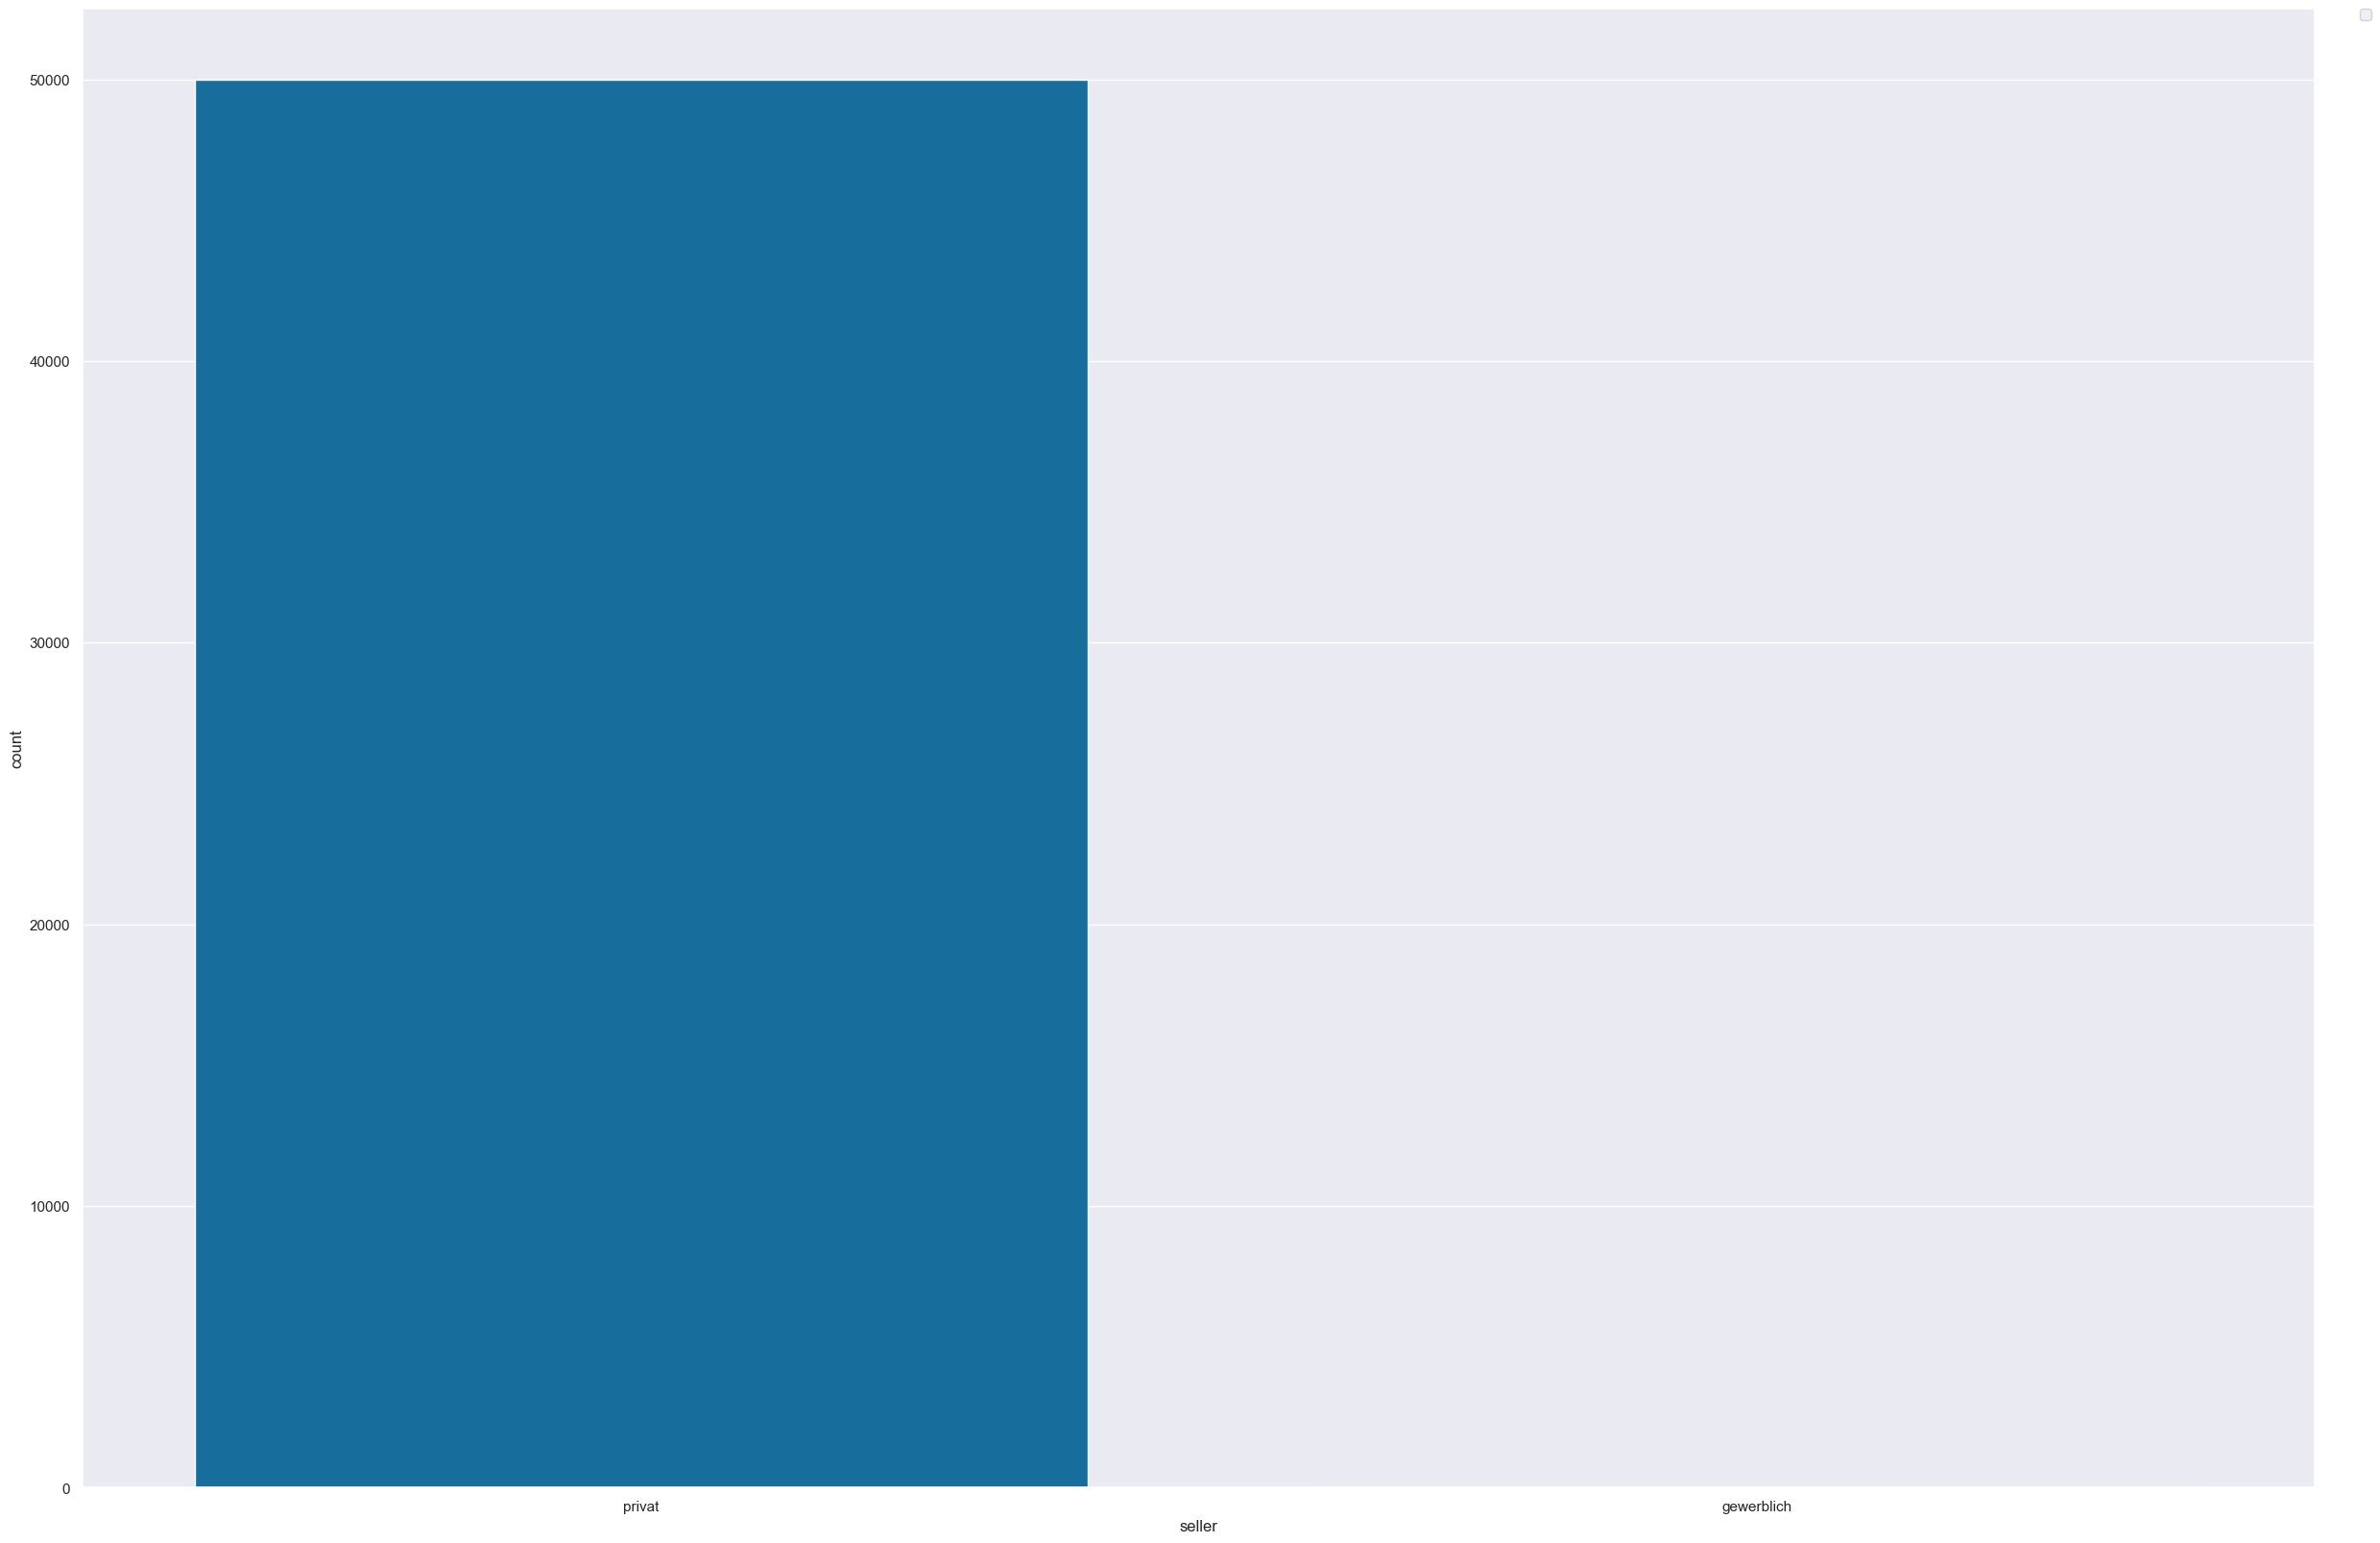

In [7]:
sns.set(rc={'figure.figsize':(30,20)})
sns.countplot(data = df, x = 'seller', palette = 'colorblind')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

Here, there are only 2 main sellers which `'privat'` dominates over the `'gewerblich'`. `'privat'` stands for `'private'` seller in german and `'gewerblich'` stands for `'dealer'` in german. We don't want the `'gewerblich'` because it has only a small proportion over the `privat` one, hence we'll deal with them later.

For our next exploration we want to find out further of the `name` column:

In [8]:
df['name'].nunique()

38754

In [9]:
df['name'].value_counts()

Ford_Fiesta                                                 78
Volkswagen_Golf_1.4                                         75
BMW_316i                                                    75
BMW_318i                                                    72
Volkswagen_Polo                                             72
                                                            ..
peugeot_206_bj_2000rot_4tuerig_ohne_tuev_bastlerfahrzeug     1
Volvo_Volvo_S60_2.4                                          1
Sparsamer_Mitsubishi_Cold                                    1
SEAT_ALTEA_2.0_TDI__AUTOMATIK                                1
Fiat_500_C_1.2_Dualogic_Lounge                               1
Name: name, Length: 38754, dtype: int64

from the data description of the dataset, the `name` column is the headline, which the owner of the car gave to the advert. So this is just a headline, and aren't necessary for our model. We are going to remove this later.

Next, we have few data on dates namely `dateCrawled`, `yearOfRegistration`, `monthOfRegistration`, `dateCreated` and `lastSeen`. We'll check on this 5 columns:

In [10]:
df[['dateCrawled','yearOfRegistration','monthOfRegistration','dateCreated','lastSeen']]

,dateCrawled,yearOfRegistration,monthOfRegistration,dateCreated,lastSeen
0,2016-03-26 17:47:46,2004,3,2016-03-26 00:00:00,2016-04-06 06:45:54
1,2016-04-04 13:38:56,1997,6,2016-04-04 00:00:00,2016-04-06 14:45:08
2,2016-03-26 18:57:24,2009,7,2016-03-26 00:00:00,2016-04-06 20:15:37
3,2016-03-12 16:58:10,2007,6,2016-03-12 00:00:00,2016-03-15 03:16:28
4,2016-04-01 14:38:50,2003,7,2016-04-01 00:00:00,2016-04-01 14:38:50
...,...,...,...,...,...
49995,2016-03-27 14:38:19,2011,1,2016-03-27 00:00:00,2016-04-01 13:47:40
49996,2016-03-28 10:50:25,1996,5,2016-03-28 00:00:00,2016-04-02 14:18:02
49997,2016-04-02 14:44:48,2014,11,2016-04-02 00:00:00,2016-04-04 11:47:27
49998,2016-03-08 19:25:42,2013,11,2016-03-08 00:00:00,2016-04-05 16:45:07


each represents different meaning, for instance the `dateCrawled` when advert was first crawled, all field-values are taken from this date. `yearOfRegistration` means the year where the car was first registered, this has a correlation to the `monthOfRegistration` which is the month where the car was registered. `dateCreated` is the date that the ad was created in eBay. `lastSeen` is when the crawler saw the advert last online.

First we want to look at the `dateCrawled` column:

In [11]:
df.dateCrawled.value_counts().sort_values(ascending=True)

2016-03-30 20:54:50    1
2016-03-25 23:55:24    1
2016-03-28 19:56:09    1
2016-04-01 22:50:22    1
2016-03-05 20:57:20    1
                      ..
2016-03-21 20:37:19    3
2016-03-25 19:57:10    3
2016-03-10 15:36:24    3
2016-03-16 21:50:53    3
2016-04-02 11:37:04    3
Name: dateCrawled, Length: 48213, dtype: int64

Here it states that the data recorded on people crawling the website is only between **March** and **April** of 2016. We don't know if we need them for our model but we'll look deeper later. Next we want to look at the year of registration of our used cars:

In [12]:
df.yearOfRegistration.value_counts().sort_values(ascending=True).head(20)

1001    1
1943    1
8888    1
4800    1
4500    1
1953    1
1500    1
5911    1
2800    1
1938    1
1948    1
1939    1
1931    1
9996    1
1111    1
1952    1
6200    1
1000    1
1929    1
1927    1
Name: yearOfRegistration, dtype: int64

In [13]:
df.yearOfRegistration.value_counts().sort_values(ascending=False).head(20)

2000    3354
2005    3015
1999    3000
2004    2737
2003    2727
2006    2708
2001    2703
2002    2533
1998    2453
2007    2304
2008    2231
2009    2098
1997    2028
2011    1634
2010    1597
2017    1453
1996    1444
2012    1323
2016    1316
1995    1313
Name: yearOfRegistration, dtype: int64

There are many odd values like for example a car listed for registration in the year `4800`, we'll handle this later.

In [14]:
df.lastSeen.value_counts().sort_values(ascending=True)

2016-03-22 13:50:53    1
2016-04-06 21:15:36    1
2016-03-15 05:16:19    1
2016-03-29 14:46:22    1
2016-04-03 21:17:40    1
                      ..
2016-04-06 15:45:50    6
2016-04-06 06:17:24    7
2016-04-06 21:17:51    7
2016-04-07 03:16:17    7
2016-04-07 06:17:27    8
Name: lastSeen, Length: 39481, dtype: int64

The `last seen` is when the crawler saws the last corresponding advert online. This column correlates to our earlier `dateCrawled` column which gives us an idea on what day and time a listing is still online, or removed because the car was sold.

In [15]:
df.dateCreated.value_counts().sort_values(ascending=True)

2016-02-16 00:00:00       1
2015-09-09 00:00:00       1
2016-02-07 00:00:00       1
2016-01-16 00:00:00       1
2015-12-30 00:00:00       1
2016-01-07 00:00:00       1
2016-02-22 00:00:00       1
2016-01-03 00:00:00       1
2015-12-05 00:00:00       1
2016-01-13 00:00:00       1
2016-01-14 00:00:00       1
2016-02-08 00:00:00       1
2016-01-29 00:00:00       1
2016-01-22 00:00:00       1
2016-02-01 00:00:00       1
2015-11-10 00:00:00       1
2015-08-10 00:00:00       1
2015-06-11 00:00:00       1
2016-02-17 00:00:00       1
2016-02-11 00:00:00       1
2016-02-18 00:00:00       2
2016-02-24 00:00:00       2
2016-02-14 00:00:00       2
2016-02-20 00:00:00       2
2016-01-10 00:00:00       2
2016-02-02 00:00:00       2
2016-02-09 00:00:00       2
2016-02-05 00:00:00       2
2016-02-26 00:00:00       2
2016-02-21 00:00:00       3
2016-01-27 00:00:00       3
2016-02-12 00:00:00       3
2016-02-25 00:00:00       3
2016-02-19 00:00:00       3
2016-02-23 00:00:00       4
2016-03-01 00:00:00 

For our `dateCreated` is when the seller lists it's advert online, NOT listing. We saw lots of variation of ad created within the dates. From the dates data we think we can do something to not have so many dates within our data. So we'll handle them later into our data cleaning section.

Next we want to see our brands listed in this website:

In [16]:
print(f'Number of unique values :', df['brand'].nunique())
df['brand'].value_counts()

Number of unique values : 40


volkswagen        10687
opel               5461
bmw                5429
mercedes_benz      4734
audi               4283
ford               3479
renault            2404
peugeot            1456
fiat               1308
seat                941
skoda               786
mazda               757
nissan              754
smart               701
citroen             701
toyota              617
sonstige_autos      546
hyundai             488
volvo               457
mini                424
mitsubishi          406
honda               399
kia                 356
alfa_romeo          329
porsche             294
suzuki              293
chevrolet           283
chrysler            181
dacia               129
daihatsu            128
jeep                110
subaru              109
land_rover           99
saab                 80
daewoo               79
trabant              78
jaguar               77
rover                69
lancia               57
lada                 31
Name: brand, dtype: int64

Here we have 40 different brands with the top 5 being the german cars. When reminded that this is a german eBay website, it's understandable. For this  project, we want to specify on predicting the number of brands based being only in the `top 5` :

Now we want to filter those top 5 brands:

In [17]:
brand = df['brand'].value_counts()
filtered_brand = brand[brand>4000]

And make a plot out of it:

<AxesSubplot:>

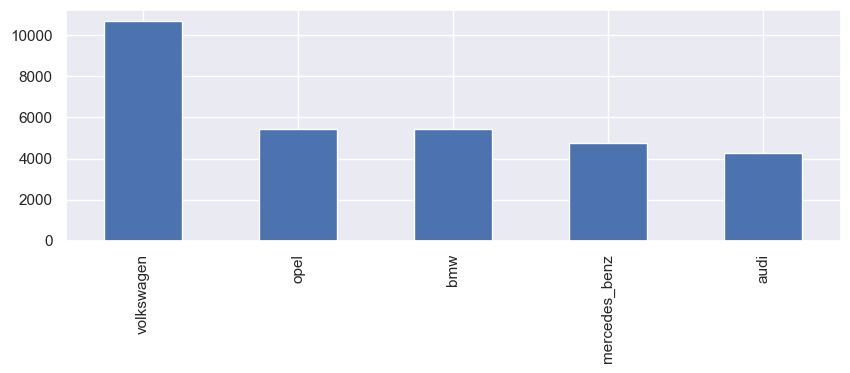

In [18]:
plt.subplots(figsize=(10,3))
filtered_brand.plot(kind='bar')

We could see that from our top 5, the volkswagen dominates our data more than the others with over than 10.000 counts. Meaning that in this german website, people preferredly listed their own local car maker.

Then we want to find out how many mileage does the used car has and the total counts of them :

<AxesSubplot:>

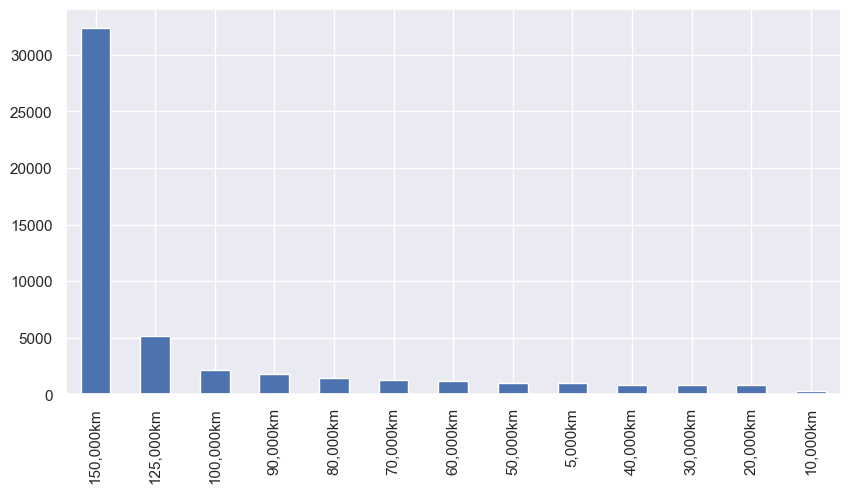

In [19]:
plt.subplots(figsize=(10,5))
df['odometer'].value_counts().plot(kind='bar')

Here we see that the used car listing is dominated by high mileages (150.000km) with over 30.000 total counts of used cars. **This means we have a high usage of the car before it was listed on eBay**. Next we want to see the the price distribution in our dataframe.

In [20]:
df['price'].value_counts().sort_index(ascending=True).head(20)

$0        1421
$1         156
$1,000     639
$1,039       1
$1,040       1
$1,049       6
$1,050      95
$1,059       1
$1,070       1
$1,080       6
$1,090       4
$1,095       3
$1,098       1
$1,099      44
$1,100     376
$1,111      39
$1,112       1
$1,119       1
$1,120       2
$1,149      10
Name: price, dtype: int64

In [21]:
df['price'].value_counts().sort_index(ascending=False).head(20)

$999,999         2
$999,990         1
$999           434
$998             5
$996             1
$995             5
$990           147
$99,999,999      1
$99,900          2
$99,000          2
$99             19
$989             2
$985             4
$980            48
$98,500          1
$975             2
$970             7
$965             2
$960             1
$958             1
Name: price, dtype: int64

In [22]:
df['price'].describe()

count     50000
unique     2357
top          $0
freq       1421
Name: price, dtype: object

Here we saw the price is still a string noted by the currency `$` that's still intact. We'll handle these later since it's our target data where we want to predict the price of the used cars if one wants to list it's car for sale. And olso we saw a lot of cars priced at `0` dollars, and `999.999` dollars which is not good for our overall precision of data, we'll handle this later

Next we want to find the proportions of listed cars based on the `'gearbox'` type. But first we want to sample some data because we have lot's of data entries to ease our visualization:

<AxesSubplot:>

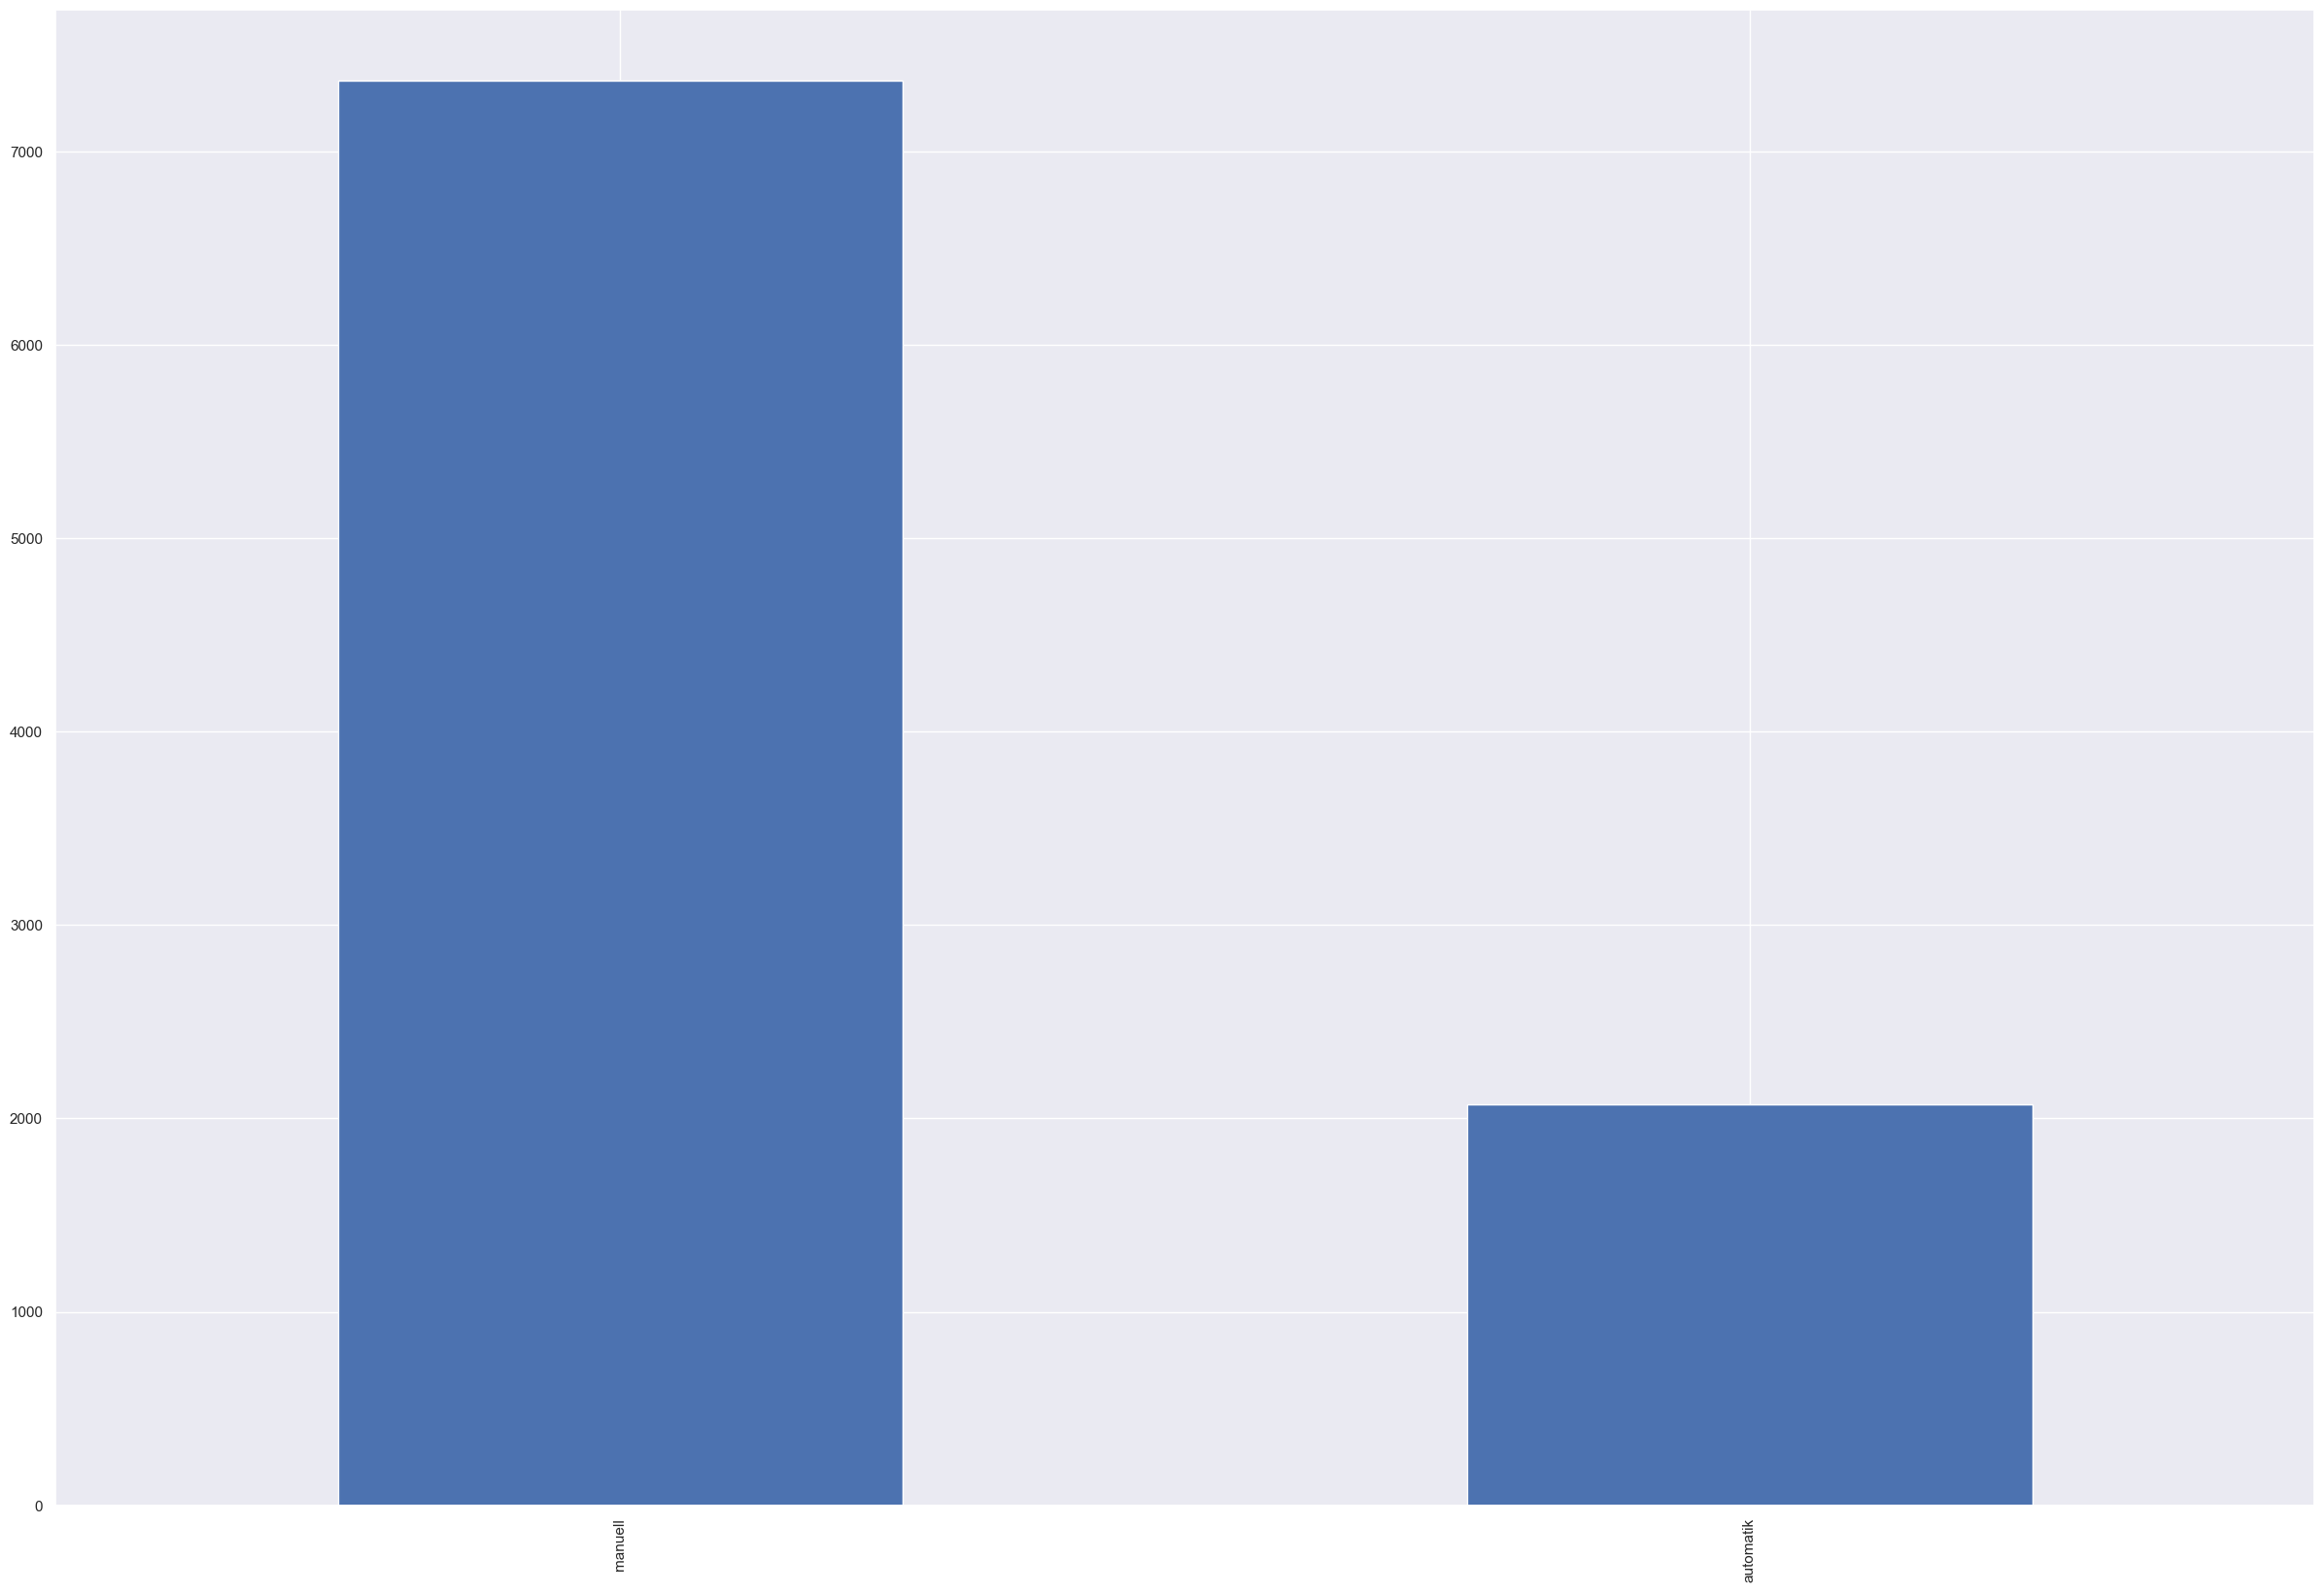

In [23]:
gearbox_eda = df.sample(n=10000)
gearbox_eda['gearbox'].value_counts().plot(kind='bar')

From our plot above we could see that we have higher proportions of `manual` gearboxes listed than `automatic` ones. 

Next we want to see what type of vehicles that people listed in eBay website:

<AxesSubplot:xlabel='vehicleType', ylabel='count'>

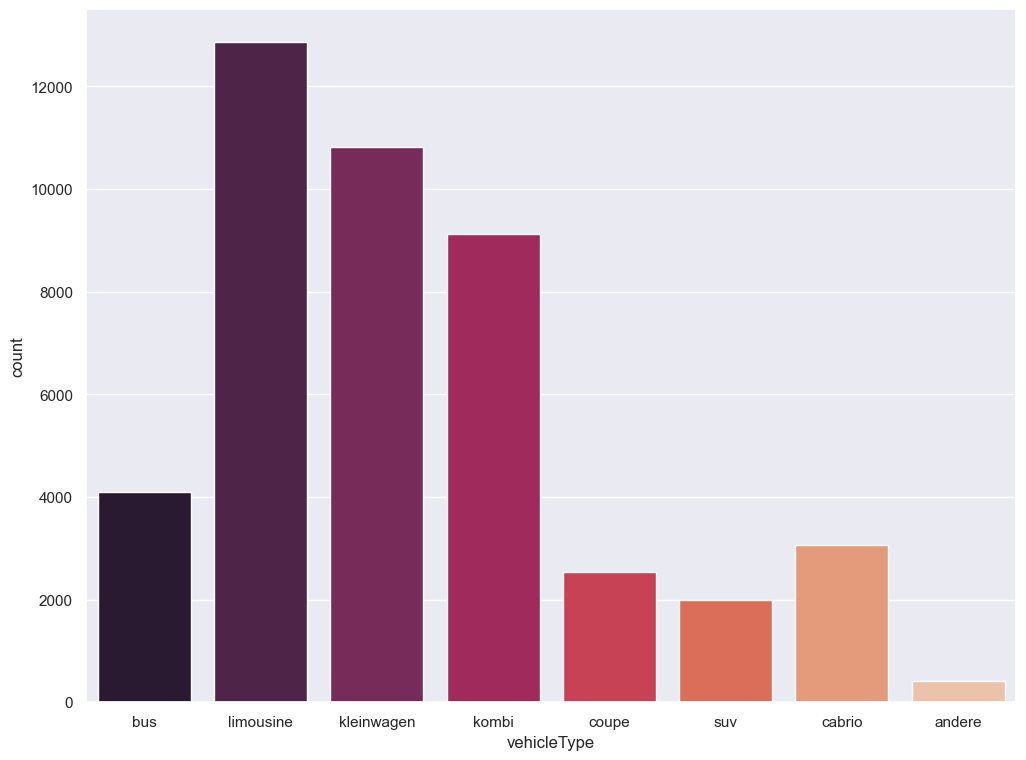

In [24]:
sns.set(rc={'figure.figsize':(12,9)})
sns.countplot(data=df, x = 'vehicleType', palette = 'rocket')

We could see that the most dominated `vehicle type` listed in eBay Kleinanzeigen is the **limousine** followed by `kleinwagen` which in english stands for **small cars**.

We want to see what lies in the `nrOfPictures` as seen below:

In [25]:
df.nrOfPictures.unique()

array([0])

We saw that `nrOfPictures` column is irrelevant since it has only a single unique value, hence we will handle this in our next section.

Now we're interested in looking at the offertypes of our data, in this data description states that this is the offer type of either `'Angebot'(ger)/'offer'(en)` or `'Gesuch'(ger)/'request'(en)`

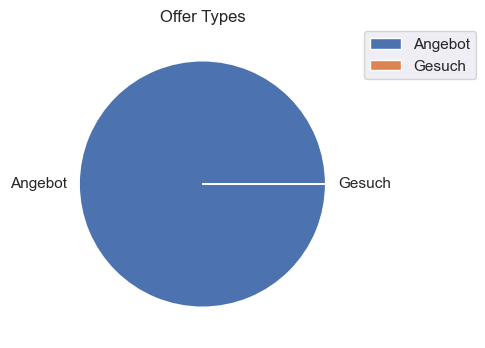

In [26]:
plt.subplots(figsize=(10,4))
df.offerType.value_counts().plot(kind = 'pie',title='Offer Types',ylabel='')
plt.legend(bbox_to_anchor=(1, 1.02), loc='upper left')

Since the `Gesuch` only represents so little in contribution to our whole data. And its only a small fraction hence we choose to not use this column and assume that all the `offerTypes` are `Angebot(Offer)`

In [27]:
df.notRepairedDamage.value_counts()

nein    35232
ja       4939
Name: notRepairedDamage, dtype: int64

## **DATA CLEANING**

> In this section we want to perform some cleaning and manipulation in our data so our data could be handled accordingly in the next sections.

### **DATA MANIPULATION**

#### Filtering our dataframe based on the `top 5` **Brands** in total listings

Before we do further cleaning into our data, we want to filter our data to only the top 5 brands that has the most count of listings. In our data exploration before we found out that the top 5 are : `volkswagen`, `opel`, `bmw`, `mercedes_benz`, `audi`:

In [28]:
df_filtered = df[df['brand'].isin(['volkswagen', 'opel', 'bmw', 'mercedes_benz','audi'])]

After we filtered our data, it's time to check if we really successfully filtered our data:

In [29]:
df_filtered['brand'].value_counts()

volkswagen       10687
opel              5461
bmw               5429
mercedes_benz     4734
audi              4283
Name: brand, dtype: int64

In [30]:
df_filtered.shape

(30594, 20)

We could see that our filtered data has only `30.594` data left which means we have still alot of data left. Off to the next stuff's.

#### `Price` data type changing and manipulation

Earlier, we found out that our price data is on the string format, so in order for us to create a regression model we have to convert this into a numerical format namely integer.

In [31]:
df_filtered["price"] = (df_filtered["price"]
                          .str.replace("$","")
                          .str.replace(",","")
                          .astype(int)
                          )

In [32]:
df_filtered['price'].head()

1     8500
2     8990
6      300
7     1990
10     999
Name: price, dtype: int64

Here we can see that our price has changed into a readable format that our regression models could work on.

In [33]:
df_filtered=df_filtered[df_filtered['price'].between(1000,35000)]
df_filtered['price'].describe().T

count    24185.000000
mean      7215.635642
std       6657.479804
min       1000.000000
25%       2350.000000
50%       4800.000000
75%       9850.000000
max      35000.000000
Name: price, dtype: float64

#### `odometer` data type changing and manipulation

Here we want to convert the odometer datatype also into integer, because we want this column to act as a numerical feature for this project.

In [34]:
df_filtered["odometer"] = (df_filtered["odometer"]
                          .str.replace("km","")
                          .str.replace(",","")
                          .astype(int)
                          )

In [35]:
df_filtered['odometer'].dtype

dtype('int64')

Here we can see that our datatype has been changed.

#### `seller` column removal

Earlier in our data exploration we could see that we want to eliminate the `'gewerblich'` since it only represents a total 3 entries to our whole data. Since we want to remove it, we only have `1` seller category which is `privat` so we don't need this column anymore. Hence we chose to remove the whole columns in our code below:

In [36]:
df_filtered = df_filtered.drop('seller', axis =1)

In [37]:
df_filtered.shape

(24185, 19)

Here we can see that our columns is removed.

#### `nrOfPictures` column removal

In our exploration before, we saw that we don't need the `nrOfPictures` column since it doesn't have any data

In [38]:
df_filtered = df_filtered.drop('nrOfPictures', axis =1)

In [39]:
df_filtered.shape

(24185, 18)

#### `offerType` column removal

We also want to remove our offertype column since in our opinion, has no impact for our prediction.

In [40]:
df_filtered = df_filtered[df['offerType'] != 'Gesuch']
df_filtered = df_filtered.drop('offerType', axis = 1)

In [41]:
df_filtered.shape

(24185, 17)

#### `name` column removal

The name column is also not relevant for our project, it only states the name of advert. So it's no use anymore for us hence we want to remove it.

In [42]:
df_filtered = df_filtered.drop('name', axis = 1)
df_filtered.shape

(24185, 16)

#### `abtest` column removal

The abtest is also not important for us hence we want to remove it.

In [43]:
df_filtered = df_filtered.drop('abtest', axis = 1)
df_filtered.shape

(24185, 15)

#### `DATES` column removal

We also dont need the dates data since we want to only predict the cars, not by date.

In [44]:
df_filtered = df_filtered.drop(['dateCrawled','dateCreated','lastSeen'], axis = 1)

#### `monthofregistration` column removal

The months registration is also isn't necessary, since for us we only need the registration year of the used cars.

In [45]:
df_filtered = df_filtered.drop('monthOfRegistration', axis = 1)
df_filtered.shape

(24185, 11)

#### `yearOfRegistration` column manipulation

Here we want to filter our registration year for us to find relevancy in this project, we only want to filtered registered cars between `1863` to `2016`.

In [46]:
df_filtered = df_filtered[(df_filtered.yearOfRegistration >= 1863) & (df_filtered.yearOfRegistration < 2017)]

In [47]:
df_filtered.yearOfRegistration.describe()

count    23308.000000
mean      2003.589540
std          6.627853
min       1929.000000
25%       2000.000000
50%       2004.000000
75%       2008.000000
max       2016.000000
Name: yearOfRegistration, dtype: float64

Here we see that our changes has taken effect.

#### `powerPS` column manipulation

Now we want to manipulate the `horsepower` of our used cars to only between 0 and 999. Because for us more than 1000 `horsepowers` is not impossible, but who does this anyways.

In [48]:
df_filtered = df_filtered[(df_filtered.powerPS > 0) & (df_filtered.powerPS < 1000)]
df_filtered.powerPS.describe()

count    21694.000000
mean       143.309348
std         60.175532
min          9.000000
25%        102.000000
50%        140.000000
75%        170.000000
max        923.000000
Name: powerPS, dtype: float64

Now we have manipulated and removed some features we don't need from the start. It's time to start cleaning.

### **DATA CLEANING**

Now we want to clean our data, first we check our null values:

In [49]:
df_filtered.isnull().sum()

price                    0
vehicleType            536
yearOfRegistration       0
gearbox                252
powerPS                  0
model                  521
odometer                 0
fuelType               816
brand                    0
notRepairedDamage     2631
postalCode               0
dtype: int64

To keep it simple, we just chose to drop the missing values altogether since we have alot of reserved data:

In [50]:
df_filtered.dropna(axis = 0, inplace=True)

In [51]:
df_filtered.shape

(18019, 11)

We still have alot of data left after dropping the missing values. It's time to check for other missing values:

In [52]:
#checking other common missing values
miss_vals = {}

for i in list(df_filtered.columns):
    miss_vals[i] = 0
    for j in df_filtered[i]:
        if j in ['N/A', '--', '-', 'Null', '?', ' ?', 'NaN', ' NaN']:
            miss_vals[i] = miss_vals[i] + 1
miss_vals

{'price': 0,
 'vehicleType': 0,
 'yearOfRegistration': 0,
 'gearbox': 0,
 'powerPS': 0,
 'model': 0,
 'odometer': 0,
 'fuelType': 0,
 'brand': 0,
 'notRepairedDamage': 0,
 'postalCode': 0}

Looks like theres no other common missing values. Next we want to check on our duplicate data's:

In [53]:
#check data duplicates
duplicates = df_filtered[df_filtered.duplicated()]
duplicates

,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,fuelType,brand,notRepairedDamage,postalCode
1329,1399,kombi,1999,manuell,75,astra,150000,benzin,opel,nein,65428
1815,1650,kleinwagen,1998,manuell,75,golf,150000,benzin,volkswagen,nein,39218
3268,7950,kombi,2009,manuell,136,c_klasse,150000,diesel,mercedes_benz,ja,35415
5924,6990,bus,2007,manuell,150,zafira,150000,diesel,opel,nein,65474
6653,27900,cabrio,2005,automatik,245,sl,90000,benzin,mercedes_benz,nein,75382
7688,4500,limousine,2002,manuell,150,e_klasse,150000,diesel,mercedes_benz,nein,31303
8244,6500,cabrio,1985,automatik,204,sl,150000,benzin,mercedes_benz,nein,23866
8437,2950,kleinwagen,1999,manuell,120,polo,150000,benzin,volkswagen,nein,42859
8778,12900,limousine,2006,automatik,224,andere,150000,diesel,mercedes_benz,nein,12353
9484,19800,suv,2010,automatik,177,x_reihe,80000,diesel,bmw,nein,76227


We have lot's of duplicate data. Now we want to remove those duplicates because it fills up our whole data and is irrelevant:

In [54]:
df_filtered.drop(duplicates.index, axis = 0, inplace=True)

In [55]:
df_filtered.duplicated().any()

False

Here we see that our duplicates has been removed. Now off we go to the next section.

## **DATA SPLITTING**

Next, we want to split the data into `Train` and `Test` so we could make sure we have made a reliable model. Before splitting we want to take some samples from our data so we could test our finished model in the end of this project:

In [56]:
inference = df_filtered.sample(2)
inference

,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,fuelType,brand,notRepairedDamage,postalCode
25437,8100,cabrio,2004,automatik,170,z_reihe,150000,benzin,bmw,nein,38723
24591,13599,kombi,2010,automatik,231,a6,150000,diesel,audi,nein,18181


We are going to save this sample value into `'inference'` variable for us to use later. Then we are going to remove the inferenced data from our dataframe so it doesn't intervene when we're doing the data inference later in this section.

In [57]:
df_filtered = df_filtered.drop(inference.index, axis=0)

Next, we are going to define our features and target into X and y train and test, and adding our target into the y variable.

In [58]:
X = df_filtered.drop('price',axis=1)
y = df_filtered['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

Here on the parameters of the train test split, we want to use a test size of `20%`, meaning we have `80%` of train data

Then we checked our X and y train tests shape : 

In [59]:
print(f'X_train shape : ',X_train.shape)
print(f'X_test shape : ',X_test.shape)
print(f'y_train shape : ',y_train.shape)
print(f'y_test shape : ',y_test.shape)

X_train shape :  (14183, 10)
X_test shape :  (3546, 10)
y_train shape :  (14183,)
y_test shape :  (3546,)


Off to our next exploration.

## **EDA ANALYSIS FOR FEATURE SELECTION AND MODELLING**

> Now, in this section is we will explain further analysis of our data and select the features we think are important for our modelling.

In [60]:
df_new = pd.concat([X_train, y_train], axis = 1)
df_new.shape

(14183, 11)

Then we want to split our **identified useful candidate features** into numerical and categorical data types :

In [61]:
#splitting our data into categorical and numerical
category = ['vehicleType', 'gearbox', 'model', 'fuelType', 'brand']
numerical = ['price','odometer','yearOfRegistration','powerPS']

#showing the splitting results
print(f'=='*20,'Categorical Features','=='*20)
print(category)
print('')
print(f'=='*20,'Numerical Features','=='*20)
print(numerical)

======================================== Categorical Features ========================================
['vehicleType', 'gearbox', 'model', 'fuelType', 'brand']

======================================== Numerical Features ========================================
['price', 'odometer', 'yearOfRegistration', 'powerPS']


Here there are some important things to notice. We want to select some categorical data to act as a numerical feature. the `odometer`, `yearOfRegistration` and `powerPS` was an categorical data in the first place, but for us to determine the price of the used car we must take these three features into account so we could then create a hopefully better model at predicting the used car price.

### **NUMERICAL FEATURES ANALYSIS**


> In this section we want to analyze the numerical features we splitted earlier. Follow along our journey in finding the features we needed for our model.

Let's see our descriptive values on our numerical column :

In [62]:
#looking at our descriptive values
df_num = df_new[numerical]
df_num.describe().T

,count,mean,std,min,25%,50%,75%,max
price,14183.0,7957.711415,7003.645680,1000.0,2650.0,5500.0,10990.0,35000.0
odometer,14183.0,126981.245153,37827.661265,5000.0,125000.0,150000.0,150000.0,150000.0
yearOfRegistration,14183.0,2003.914264,6.245324,1941.0,2000.0,2004.0,2008.0,2016.0
powerPS,14183.0,144.305577,59.987936,10.0,102.0,140.0,170.0,740.0


Then we want to check our numerical data distribution:

In [63]:
skew_val = df_new[numerical].skew()
skew_val.to_frame()

,0
price,1.451182
odometer,-1.540007
yearOfRegistration,-1.344630
powerPS,1.417658


Then plotting our numerical data to see if there are any outliers

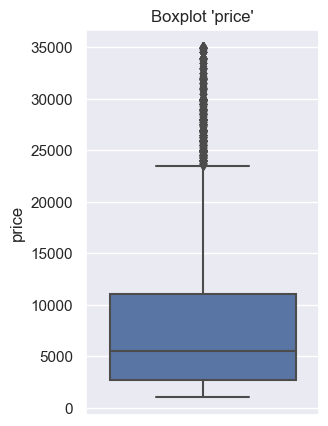

price Skewness: 1.4511819781691981
Columns 'price' right skewed


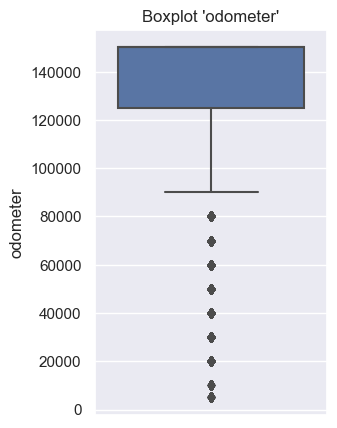

odometer Skewness: -1.5400067921805376
Columns 'odometer' left skewed


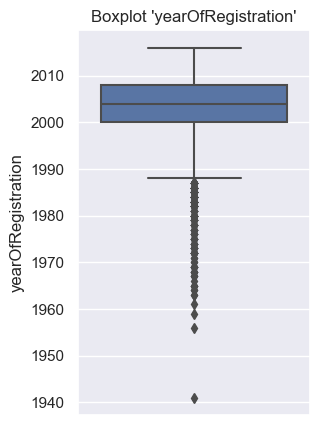

yearOfRegistration Skewness: -1.3446302742358363
Columns 'yearOfRegistration' left skewed


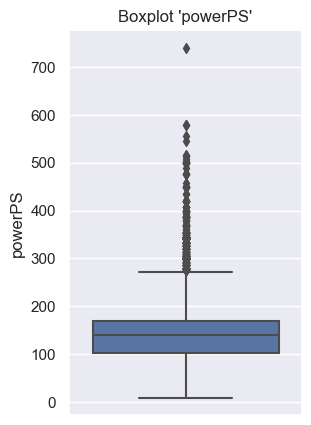

powerPS Skewness: 1.417657874738602
Columns 'powerPS' right skewed


In [64]:
def plot_outlier(df_num, col):
    fig, ax = plt.subplots(figsize = (3, 5))
    
    sns.boxplot(y=df_num[col], ax =  ax)
    ax.set_title(f"Boxplot '{col}'")
    plt.show()
    
    print(df_num[col].name + ' Skewness: ' + str(df_num[col].skew()))
    if -0.5 <= df_num[col].skew() <= 0.5:
        print("Columns '{}' normal distribution".format(col))
    elif df_num[col].skew() > 0.5:
        print("Columns '{}' right skewed".format(col))
    elif df_num[col].skew() < -0.5:
        print("Columns '{}' left skewed".format(col))

for col in df_num.columns:
    plot_outlier(df_num, col)

Here we see some pretty skewed distribution within our data. For our objectives which is regression, **any outliers has an impact on the calculation of the algorithm**. So it's best for us to handle these outliers in our numerical data's. For our handling method, we used the `Capping` method **which is minimizing the influence of outliers in our data by assigning the outlier a lower weight or changing the value so that it is close to other values in the set** as implemented in our code below: 

In [65]:
wins = Winsorizer(capping_method='iqr', tail='both', fold=1.5, variables=['price','odometer','yearOfRegistration','powerPS'])
df_num = wins.fit_transform(df_num)

Now that our outliers has been capped, we want to see the changes by making a visualization on the handled features:

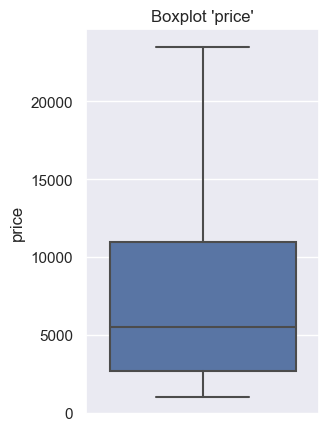

price Skewness: 1.0933290613958877
Columns 'price' right skewed


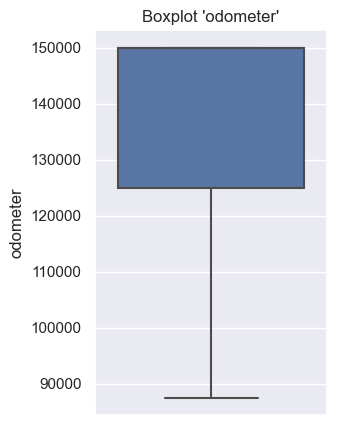

odometer Skewness: -0.9873821252641849
Columns 'odometer' left skewed


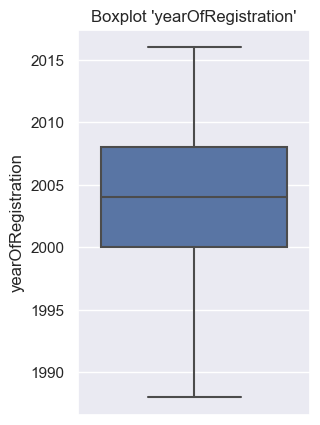

yearOfRegistration Skewness: -0.5159743938760548
Columns 'yearOfRegistration' left skewed


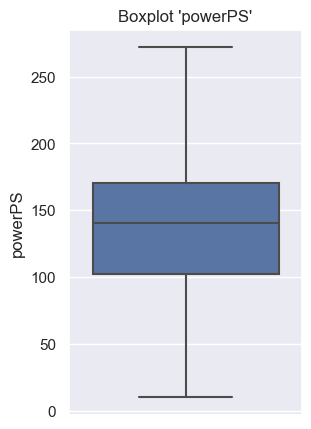

powerPS Skewness: 0.5787221922631011
Columns 'powerPS' right skewed


In [66]:
def plot_outlier(df_num, col):
    fig, ax = plt.subplots(figsize = (3, 5))
    
    sns.boxplot(y=df_num[col], ax =  ax)
    ax.set_title(f"Boxplot '{col}'")
    plt.show()
    
    print(df_num[col].name + ' Skewness: ' + str(df_num[col].skew()))
    if -0.5 <= df_num[col].skew() <= 0.5:
        print("Columns '{}' normal distribution".format(col))
    elif df_num[col].skew() > 0.5:
        print("Columns '{}' right skewed".format(col))
    elif df_num[col].skew() < -0.5:
        print("Columns '{}' left skewed".format(col))

for col in df_num.columns:
    plot_outlier(df_num, col)

Now our data has been clean of outliers, it's time to find correlation with our target label for this project, which is `price`:

<AxesSubplot:>

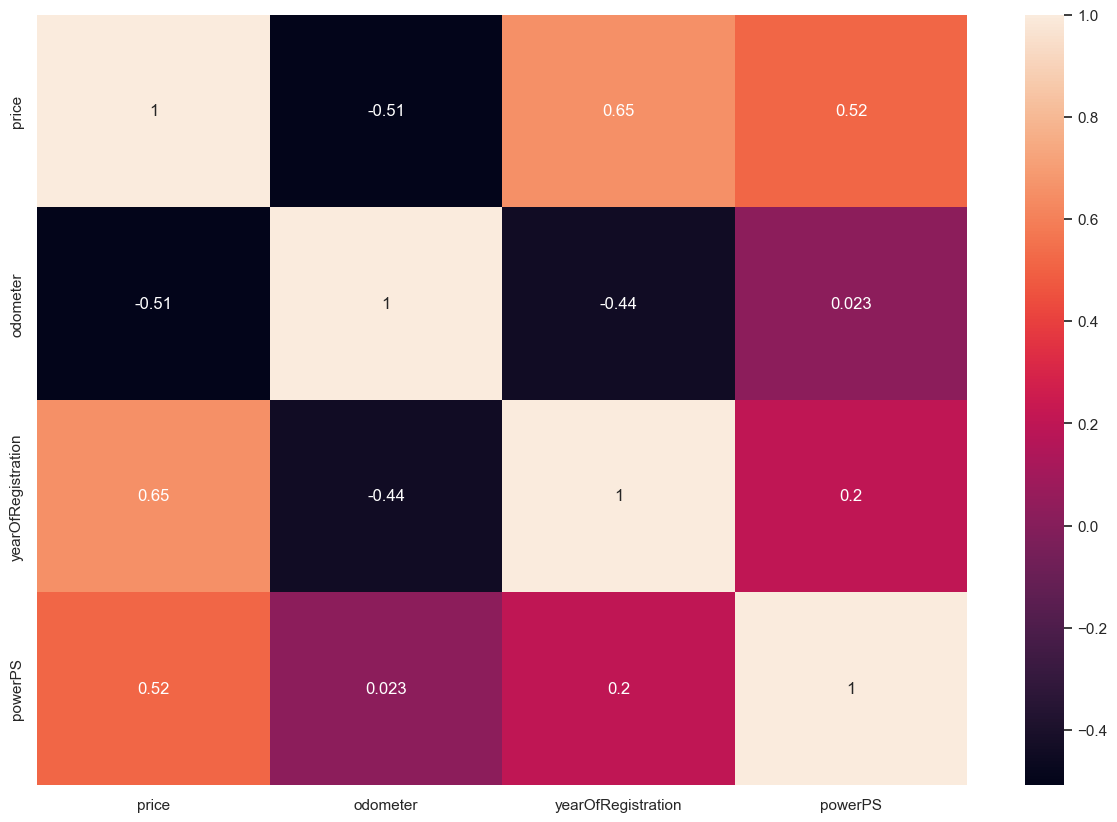

In [67]:
# numerical features correlation matrix
num_corr = pd.concat([df_num.reset_index(drop=True)],axis = 1)
plt.figure(figsize=(15,10))
sns.heatmap(num_corr.corr(),annot=True)

From our pearsons correlation matrix we could conclude that we are going to use all of the features in this numerical data type as our features for modelling. So here is the end result of our selected features on numerical data type:

In [68]:
# dropping unnecessary features
df_cleaned = df_num 
df_cleaned.head()

,price,odometer,yearOfRegistration,powerPS
36886,3300.0,150000.0,1998.0,122.0
8727,1250.0,150000.0,2000.0,65.0
41002,23500.0,87500.0,2012.0,160.0
14251,3200.0,150000.0,2002.0,75.0
35846,10000.0,87500.0,2009.0,80.0


After we selected the features, we want to scale our numerical features so the algorithm doesn't pick the most dominant feature. For our scaling we will use the `standard scaler` because we already handled the outliers.

In [69]:
#Scaling numerical features
scaler = StandardScaler()

df_cleaned[numerical] = scaler.fit_transform(df_cleaned[numerical])

df_cleaned.head()

,price,odometer,yearOfRegistration,powerPS
36886,-0.695910,0.675767,-1.063599,-0.380832
8727,-1.017326,0.675767,-0.712343,-1.451500
41002,2.471216,-1.778777,1.395190,0.332947
14251,-0.711588,0.675767,-0.361088,-1.263663
35846,0.354573,-1.778777,0.868307,-1.169745


Now it's time for us to move on to the next section which is analyzing the categorical features.

### **CATEGORICAL FEATURES ANALYSIS**


> Next is we want to analyze our categorical features. In our code below we assign our categorical data into a new dataframe variable:

In [70]:
df_cat = df_new[category]
df_cat.head()

,vehicleType,gearbox,model,fuelType,brand
36886,limousine,manuell,c_klasse,benzin,mercedes_benz
8727,kleinwagen,manuell,corsa,benzin,opel
41002,cabrio,manuell,tt,benzin,audi
14251,kombi,manuell,golf,benzin,volkswagen
35846,bus,manuell,caddy,benzin,volkswagen


And the next step we want to see the unique values of our categorical data types from our loop below:

In [71]:
for i in df_cat:
    print(f'{i} : {df_cat[i].unique()}')
    print(f'')
    print(f'{i} total unique values : {df_cat[i].nunique()}')
    print('=='*20)

vehicleType : ['limousine' 'kleinwagen' 'cabrio' 'kombi' 'bus' 'coupe' 'andere' 'suv']

vehicleType total unique values : 8
gearbox : ['manuell' 'automatik']

gearbox total unique values : 2
model : ['c_klasse' 'corsa' 'tt' 'golf' 'caddy' '3er' 'a6' 'andere' 'zafira' 'a3'
 'meriva' 'passat' 'e_klasse' '7er' 'lupo' 'astra' '5er' 'x_reihe'
 'm_klasse' '1er' 'a_klasse' 'sprinter' 'a4' 'z_reihe' 'cl' '80'
 'transporter' 'm_reihe' 'sharan' 'a2' 'polo' 'clk' 'eos' 'phaeton'
 'insignia' 'scirocco' 's_klasse' 'kaefer' 'viano' 'antara' 'omega' 'q5'
 'vectra' 'touran' 'sl' 'vito' 'beetle' 'slk' 'a5' 'q7' 'fox' 'signum'
 'b_klasse' 'a1' 'bora' 'vivaro' 'kadett' 'tigra' 'jetta' 'touareg' 'a8'
 'q3' 'gl' 'tiguan' 'combo' 'up' '100' 'g_klasse' 'glk' '6er' 'cc' 'agila'
 'calibra' 'amarok' 'v_klasse' '90' '200']

model total unique values : 77
fuelType : ['benzin' 'diesel' 'cng' 'lpg' 'elektro' 'andere' 'hybrid']

fuelType total unique values : 7
brand : ['mercedes_benz' 'opel' 'audi' 'volkswagen' 'bm

Here we could see that we have a high cardinality in the `model` feature. It's understandable because this feature represents the models for a specific car. From this categorical data type, we think that the `vehicleType` is not necessary. The next thing we want to do is we want to encode our data so it could be read by our algorithm:

In [72]:
#ordinal encoding
ord_enc = OrdinalEncoder()
cat_ord = pd.DataFrame(ord_enc.fit_transform(df_cat))
cat_ord.columns = df_cat.columns

For our encoding, we opt out to use the **ordinal encoder**, the reasoning is each value in this categorical data type has an impact in the car sales. For example different `model`, `fuelType` or `brand` can result in a different prediction in car price. Now that our encoding has been done, it's time for us to see the correlation of these features with our target label `price`:

<AxesSubplot:>

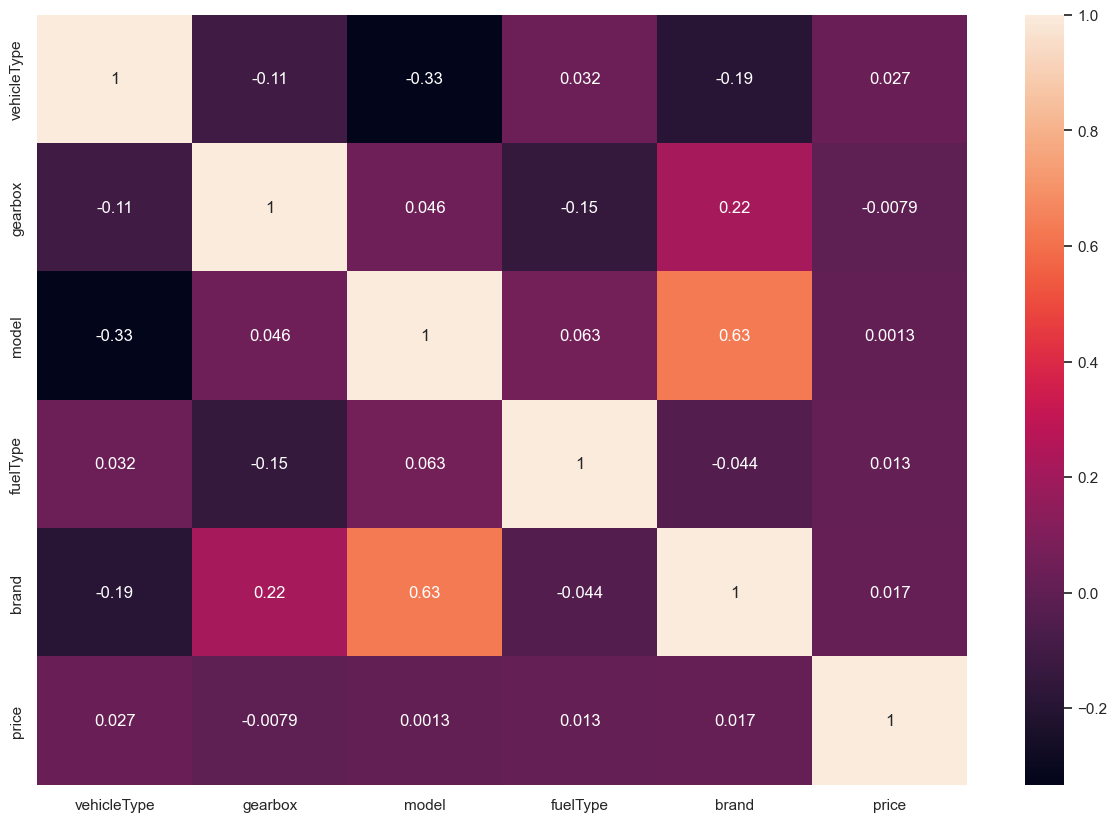

In [73]:
cat_corr = pd.concat([cat_ord.reset_index(drop=True),df_cleaned['price']], axis = 1)
plt.figure(figsize=(15,10))
sns.heatmap(cat_corr.corr(),annot=True)

**Surprisingly**, we saw a low correlation between these categorical features within our target label. Even though earlier we suspected a pretty high correlation in these features to our target. We are still going to use these features **except** the `vehicleType` because by our judgement these features is important for us to determine the price of the used cars.

In [74]:
# merging numerical and categorical features 
new_df = pd.concat([df_cleaned.reset_index(drop=True),cat_ord],axis =1)
new_df.head()

,price,odometer,yearOfRegistration,powerPS,vehicleType,gearbox,model,fuelType,brand
0,-0.695910,0.675767,-1.063599,-0.380832,6.0,1.0,25.0,1.0,2.0
1,-1.017326,0.675767,-0.712343,-1.451500,4.0,1.0,32.0,1.0,3.0
2,2.471216,-1.778777,1.395190,0.332947,2.0,1.0,67.0,1.0,0.0
3,-0.711588,0.675767,-0.361088,-1.263663,5.0,1.0,39.0,1.0,4.0
4,0.354573,-1.778777,0.868307,-1.169745,1.0,1.0,26.0,1.0,4.0


In [75]:
X_train = X_train[['odometer','yearOfRegistration','powerPS','gearbox','model','fuelType','brand']]

X_test = X_test[['odometer','yearOfRegistration','powerPS','gearbox','model','fuelType','brand']]

## **PREPROCESSING**

> In this section we want to take a different approach for this project on handling our test data's as explained below.

In this preprocessing we want to create an automated process using `pipeline` from the library of sklearn. This is intended because we want to deploy this project later on into an website interface, let's start by making a pipeline for our numerical features:

### **NUMERICAL FEATURES PIPELINE**

As explained before, here we create a pipeline for our numerical features. Earlier in our feature selection we did some **outlier handling** and some scaling. So for this pipeline we want to mimic the same behaviours we did to our train data.

In [76]:
num_pipeline = Pipeline([
        ('outlier', Winsorizer(capping_method='iqr', tail='both', fold=1.5)),
        ('scaler', StandardScaler())
    ])

num_tr = num_pipeline.fit_transform(pd.DataFrame(X_train[['odometer', 'powerPS', 'yearOfRegistration']]))
num_tr

array([[ 0.67576725, -0.38083157, -1.06359866],
       [ 0.67576725, -1.45149996, -0.71234313],
       [-1.77877718,  0.33294735,  1.39519002],
       ...,
       [-1.77877718, -1.63933652,  0.16579568],
       [ 0.67576725, -0.83163932, -0.53671537],
       [ 0.67576725, -0.60623544, -1.76610971]])

As you can see above, we successfully transformed our train data using the pipeline. Now off to the next section which we want to make a pipeline for our categorical features.

### Categorical features pipeline

Now we want to mimic the same behaviours as we did with our categorical feature selection before which is only ordinally encoding them :

In [77]:
cat_pipeline = Pipeline([
        ('ordinal_enc', OneHotEncoder(sparse=False, handle_unknown='ignore'))
    ])

cat_tr = cat_pipeline.fit_transform(X_train[['gearbox', 'model', 'fuelType', 'brand']])
cat_tr

array([[0., 1., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 1.]])

Now we have seen that we successfully transformed our categorical features, off to the next.

#### **Full Pipeline**

This full pipeline is intended to merge our two pipelines into 1 whole automated process. So we want to use `ColumnTransformer` to start our merging journey:

In [78]:
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, ['odometer', 'powerPS', 'yearOfRegistration']),
        ("cat_ord", cat_pipeline, ['gearbox', 'model', 'fuelType', 'brand']),
    ])

train_tr = full_pipeline.fit_transform(X_train)
train_tr

array([[ 0.67576725, -0.38083157, -1.06359866, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.67576725, -1.45149996, -0.71234313, ...,  0.        ,
         1.        ,  0.        ],
       [-1.77877718,  0.33294735,  1.39519002, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.77877718, -1.63933652,  0.16579568, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.67576725, -0.83163932, -0.53671537, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.67576725, -0.60623544, -1.76610971, ...,  0.        ,
         0.        ,  1.        ]])

The end result we successfully transformed our train data, so now we want to transform our `X_test` data using our full pipeline as you can see below:

In [79]:
test_tr = full_pipeline.transform(X_test)
test_tr

array([[ 0.67576725,  1.15942822,  1.21956226, ...,  0.        ,
         0.        ,  0.        ],
       [-0.30605052, -0.70015372, -0.53671537, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.67576725,  0.38929832,  0.16579568, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.77877718,  0.7837551 ,  0.69267897, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.67576725,  0.952808  , -0.36108761, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.67576725,  1.66658693, -0.00983208, ...,  0.        ,
         0.        ,  0.        ]])

Tadaa! we successfully transformed our `X_test` data too. Off to the next one.

## **MODEL DEFINITION**

> In this section we want to initiate our algorithm in order to create the regression model we intended to build.

For this project we want to compare **4 different regression** algorithms :
1. Linear Regression
2. Decision Tree Regressor
3. Random Forest Regressor
4. Support Vector Regressor

So the next step is we want to define our models:

In [80]:
lin_reg = LinearRegression()
dtr = DecisionTreeRegressor()
rfr = RandomForestRegressor()
svr = SVR()

For us to decide which algorithms to work on, it's best for us to compare the results of the default initiated model, so here below are the elaborations of each model performances:

In [81]:
lin_reg.fit(train_tr,y_train)
pred_train_lr = lin_reg.predict(train_tr)
pred_test_lr = lin_reg.predict(test_tr)

print("="*20,"TRAINING","="*20)
print("Mean absolute error:",mean_absolute_error(y_train,pred_train_lr))
print("R2 Score:",r2_score(y_train,pred_train_lr))
print("="*20,"TEST","="*20)
print("Mean absolute error:",mean_absolute_error(y_test,pred_test_lr))
print("R2 Score:",r2_score(y_test,pred_test_lr))

==================== TRAINING ====================
Mean absolute error: 2500.7386373651557
R2 Score: 0.7456047421376959
==================== TEST ====================
Mean absolute error: 2579.6880199520588
R2 Score: 0.7333448160139222


In [82]:
dtr.fit(train_tr,y_train)
pred_train_dt = dtr.predict(train_tr)
pred_test_dt = dtr.predict(test_tr)

print("="*20,"TRAINING","="*20)
print("Mean absolute error:",mean_absolute_error(y_train,pred_train_dt))
print("R2 Score:",r2_score(y_train,pred_train_dt))
print("="*20,"TEST","="*20)
print("Mean absolute error:",mean_absolute_error(y_test,pred_test_dt))
print("R2 Score:",r2_score(y_test,pred_test_dt))

==================== TRAINING ====================
Mean absolute error: 634.1437414570787
R2 Score: 0.9695166420884376
==================== TEST ====================
Mean absolute error: 1894.601709125025
R2 Score: 0.8090137922598317


In [83]:
rfr.fit(train_tr,y_train)
pred_train_rf = rfr.predict(train_tr)
pred_test_rf = rfr.predict(test_tr)

print("="*20,"TRAINING","="*20)
print("Mean absolute error:",mean_absolute_error(y_train,pred_train_rf))
print("R2 Score:",r2_score(y_train,pred_train_rf))
print("="*20,"TEST","="*20)
print("Mean absolute error:",mean_absolute_error(y_test,pred_test_rf))
print("R2 Score:",r2_score(y_test,pred_test_rf))

==================== TRAINING ====================
Mean absolute error: 916.1742957496772
R2 Score: 0.9579925496247735
==================== TEST ====================
Mean absolute error: 1660.8703748248986
R2 Score: 0.8590105322996255


In [84]:
svr.fit(train_tr,y_train)
pred_train_svr = svr.predict(train_tr)
pred_test_svr = svr.predict(test_tr)

print("="*20,"TRAINING","="*20)
print("Mean absolute error:",mean_absolute_error(y_train,pred_train_svr))
print("R2 Score:",r2_score(y_train,pred_train_svr))
print("="*20,"TEST","="*20)
print("Mean absolute error:",mean_absolute_error(y_test,pred_test_svr))
print("R2 Score:",r2_score(y_test,pred_test_svr))

==================== TRAINING ====================
Mean absolute error: 4494.076524657726
R2 Score: 0.06081723302528741
==================== TEST ====================
Mean absolute error: 4610.829939735451
R2 Score: 0.04106763006117975


So to sum up, we have pretty great results seen in `Decision Tree Regressor` and `Random Forest Regressor`. But we don't want to use those to models, because if we looked closer at the difference between the train and test in those two, it's **overfitting**. Meanwhile the `SVR` model has the lowest score of them all so it's definitely not good. We choose the **best fitting** model even though it has low `R2Scores` and pretty substantial `Mean Absolute Error`, but it's the better of the other anyways hence we chose those models.

### **HYPERPARAMETER TUNING**

Now we want to tune our linear regression model. Not much options here in terms of hyperparameters in our linear regression, but we'll try to work it out better anyways:

In [85]:
params = [
    {'fit_intercept': [True,False],                           
     'normalize': [True,False],         
    }         
  ]

grid_search = GridSearchCV(lin_reg, params, cv=5,
                           scoring='r2',
                           return_train_score=True)
grid_search.fit(train_tr, y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid=[{'fit_intercept': [True, False],
                          'normalize': [True, False]}],
             return_train_score=True, scoring='r2')

And then we want to see the best parameters:

In [86]:
grid_search.best_params_

{'fit_intercept': False, 'normalize': True}

The best score isn't that better than the earlier defined model, so we guess that the best core isn't going to be any better:

In [87]:
grid_search.best_score_

-9.439333485590374e+18

Yep, as we expected, but we'll still going to use the tuned hyperparameters anyways as our new model:

In [88]:
linreg_tuned = grid_search.best_estimator_

Now we want to fit our tuned model into our `train_tr`, and `y_train` :

In [89]:
linreg_tuned.fit(train_tr, y_train)

LinearRegression(fit_intercept=False, normalize=True)

And we want to show the mean absolute and r2scores:

In [90]:

pred_train_linreg = linreg_tuned.predict(train_tr)
pred_test_linreg = linreg_tuned.predict(test_tr)

print("="*20,"TRAINING","="*20)
print("Mean absolute error:",mean_absolute_error(y_train,pred_train_linreg))
print("R2 Score:",r2_score(y_train,pred_train_linreg))
print("="*20,"TEST","="*20)
print("Mean absolute error:",mean_absolute_error(y_test,pred_test_linreg))
print("R2 Score:",r2_score(y_test,pred_test_linreg))

==================== TRAINING ====================
Mean absolute error: 2500.664342722278
R2 Score: 0.7456041860092182
==================== TEST ====================
Mean absolute error: 2579.696121057101
R2 Score: 0.7333286610125908


And next we want to check our full pipeline:

In [91]:
full_pipeline

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('outlier',
                                                  Winsorizer(capping_method='iqr',
                                                             fold=1.5,
                                                             tail='both')),
                                                 ('scaler', StandardScaler())]),
                                 ['odometer', 'powerPS', 'yearOfRegistration']),
                                ('cat_ord',
                                 Pipeline(steps=[('ordinal_enc',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 ['gearbox', 'model', 'fuelType', 'brand'])])

After that we want to include our regression model to our pipeline so the process could be done simultaneously:

In [92]:
all_process = Pipeline([
    ("preprocessing", full_pipeline),
    ("regression", linreg_tuned)
])
all_process.fit(X_train, y_train)



Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('outlier',
                                                                   Winsorizer(capping_method='iqr',
                                                                              fold=1.5,
                                                                              tail='both')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['odometer', 'powerPS',
                                                   'yearOfRegistration']),
                                                 ('cat_ord',
                                                  Pipeline(steps=[('ordinal_enc',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['gearbox', 'model',
                                                   'fuelType', 'brand'])])),
                ('regression',
                 LinearRegression(fit_intercept=False, normalize=True))])

After that we want to try predict our X train and tests with our whole pipeline:

In [93]:
train_result = all_process.predict(X_train)
test_result = all_process.predict(X_test)
print(r2_score(y_train, train_result))
print(r2_score(y_test, test_result))

0.7456041860092182
0.7333286610125908


And the results is as above, our whole pipeline is able to predict and we successfully automated our project to then be fed new data's:

In [94]:
all_process

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('outlier',
                                                                   Winsorizer(capping_method='iqr',
                                                                              fold=1.5,
                                                                              tail='both')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['odometer', 'powerPS',
                                                   'yearOfRegistration']),
                                                 ('cat_ord',
                                                  Pipeline(steps=[('ordinal_enc',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['gearbox', 'model',
                                                   'fuelType', 'brand'])])),
                ('regression',
                 LinearRegression(fit_intercept=False, normalize=True))])

## **INFERENCE DATA & DEPLOYMENT**

> in this section we want to select our inferenced data and prepare for our deployment

First we select the features the same as we did with our train and tests data:

In [95]:
inference = inference[['odometer', 'powerPS', 'yearOfRegistration', 'gearbox', 'model', 'fuelType', 'brand']]

Then we want to try to predict with our whole pipeline:

In [96]:
all_process.predict(inference)

array([10840.69140625, 13436.        ])

Next we want to save our model by using pickle:

In [97]:
# save model
pickle.dump(all_process, open("M2P1_pred.pkl", "wb"))

Then we want to import our saved model:

In [98]:
# STEP 1 - Import saved model
model = pickle.load(open("M2P1_pred.pkl", "rb"))

And lastly we want to prepare our inferenced data for our user to later input:

In [99]:
# STEP 2 - Prepare input data from user
inf = inference.head(1)
inf

,odometer,powerPS,yearOfRegistration,gearbox,model,fuelType,brand
25437,150000,170,2004,automatik,z_reihe,benzin,bmw


In [100]:
# STEP 3 - model predict input data
Category = model.predict(inf).tolist()[0]
Category

10840.69140625

Then we could see that we successfully predicted our inference data with the new assigned `model`. It's time for us to deploy!

## **CONCLUSIONS**

**From our project of predicting used car sales from eBay, we can conclude that:**

1. There are only 2 main sellers which `'privat'` dominates over the `'gewerblich'`. `'privat'` stands for `'private'` seller in german and `'gewerblich'` stands for `'dealer'` in german. We don't want the `'gewerblich'` because it has only a small proportion over the `privat` one, hence we'll deal with them later.

2. from the data description of the dataset, the `name` column is the headline, which the owner of the car gave to the advert. So this is just a headline, and aren't necessary for our model. The `dateCrawled` when advert was first crawled, all field-values are taken from this date. `yearOfRegistration` means the year where the car was first registered, this has a correlation to the `monthOfRegistration` which is the month where the car was registered. `dateCreated` is the date that the ad was created in eBay. `lastSeen` is when the crawler saw the advert last online.

3. Here we have 40 different brands with the top 5 being the german cars. When reminded that this is a german eBay website, it's understandable. For this  project, we want to specify on predicting the number of brands based being only in the `top 5` of most listed used cars in this website. The used car listing is dominated by high mileages (150.000km) with over 30.000 total counts of used cars. **This means we have a high usage of the car before it was listed on eBay**.
 
4. There are alot of unused features that we did manipulation and some cleaning to. The end result is we only used 8 total features from the earlier 20.

5. We discovered alot of data duplicates, and also alot of missing values that we already handled.

6. There are some important things to notice. We want to select some categorical data to act as a numerical feature. the `odometer`, `yearOfRegistration` and `powerPS` was an categorical data in the first place, but for us to determine the price of the used car we must take these three features into account so we could then create a hopefully better model at predicting the used car price.

7. Here we could see that we have a high cardinality in the `model` feature. It's understandable because this feature represents the models for a specific car. From this categorical data type, we think that the `vehicleType` is not necessary. The next thing we want to do is we want to encode our data so it could be read by our algorithm. For our encoding, we opt out to use the **ordinal encoder**, the reasoning is each value in this categorical data type has an impact in the car sales. For example different `model`, `fuelType` or `brand` can result in a different prediction in car price. Now that our encoding has been done, it's time for us to see the correlation of these features with our target label `price`:

8. In the preprocessing section we want to create an automated process using `pipeline` from the library of sklearn. This is intended because we want to deploy this project later on into an website interface. The end result is we managed to put all of the numerical, categorical and model into a single pipeline that we can later use to deploy

9. So to sum up, we have pretty great results seen in `Decision Tree Regressor` and `Random Forest Regressor`. But we don't want to use those to models, because if we looked closer at the difference between the train and test in those two, it's **overfitting**. Meanwhile the `SVR` model has the lowest score of them all so it's definitely not good. We choose the **best fitting** model even though it has low `R2Scores` and pretty substantial `Mean Absolute Error`, but it's the better of the other anyways hence we chose those models.

10. Thank you so much for keeping up with us through our journey! :)

